In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [11]:
cleaned_files = os.listdir("cleaned_data\\")

# combining data into single frame
dataframes = [pd.read_csv(f"cleaned_data\\{file}") for file in cleaned_files]
data = pd.concat(dataframes)

In [12]:
data.tail()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week,ride_distance_km,ride_length_seconds,member_casual_binary
492403,91D42B1E3F1D5063,classic_bike,2024-06-12 21:48,2024-06-12 21:56,Ravenswood Ave & Lawrence Ave,TA1309000066,Campbell Ave & Montrose Ave,15623,41.968445,-87.674226,41.961524,-87.691177,member,00:08:00,4,1.598891,480,1
492404,DA3E5D7DFFA3C044,classic_bike,2024-06-11 17:11,2024-06-11 17:17,Damen Ave & Leland Ave,TA1307000158,Campbell Ave & Montrose Ave,15623,41.966946,-87.678893,41.961524,-87.691177,member,00:06:00,3,1.181111,360,1
492405,8DAAD10EE8F1A773,classic_bike,2024-06-13 9:11,2024-06-13 9:23,Damen Ave & Leland Ave,TA1307000158,Western Ave & Roscoe St,15634,41.966946,-87.678893,41.943034,-87.687288,member,00:12:00,5,2.748023,720,1
492406,0B00C760F3BAE044,electric_bike,2024-06-03 19:41,2024-06-03 19:46,Damen Ave & Leland Ave,TA1307000158,Campbell Ave & Montrose Ave,15623,41.967110,-87.679160,41.961524,-87.691177,member,00:05:00,2,1.171745,300,1
492407,1D1EBE57758FB1EE,electric_bike,2024-06-11 8:25,2024-06-11 8:33,Ravenswood Ave & Lawrence Ave,TA1309000066,Campbell Ave & Montrose Ave,15623,41.968466,-87.674225,41.961524,-87.691177,member,00:08:00,3,1.600092,480,1


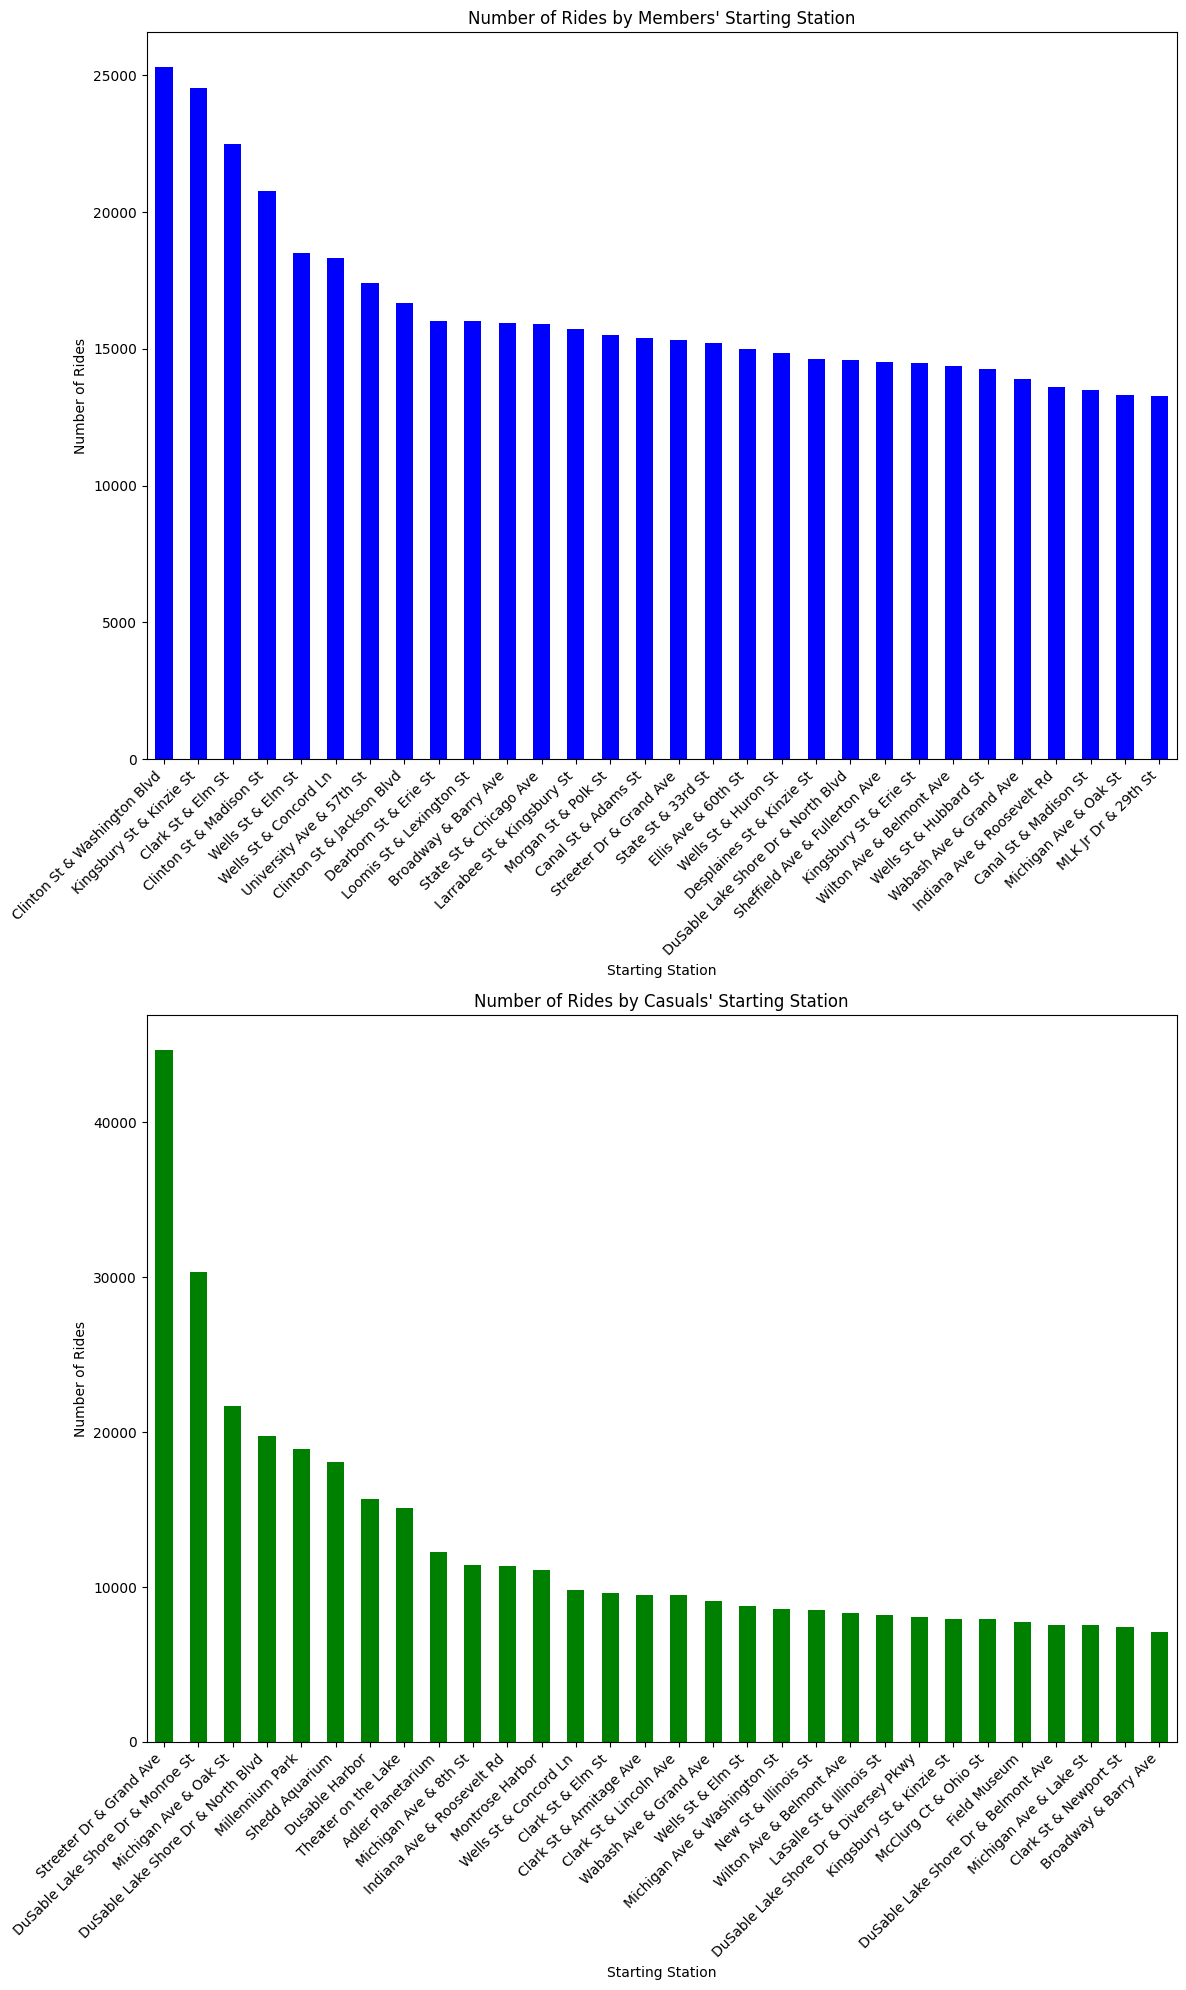

In [19]:
# Create a figure and two subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12, 20))

# Plot for members' starting station
data[data["member_casual"] == "member"]["start_station_name"].value_counts().nlargest(30).plot(
    kind='bar', ax=ax1, color='b')

ax1.set_title("Number of Rides by Members' Starting Station")
ax1.set_ylabel('Number of Rides')
ax1.set_xlabel('Starting Station')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Plot for casuals' starting station
data[data["member_casual"] == "casual"]["start_station_name"].value_counts().nlargest(30).plot(
    kind='bar', ax=ax2, color='g')

ax2.set_title("Number of Rides by Casuals' Starting Station")
ax2.set_ylabel('Number of Rides')
ax2.set_xlabel('Starting Station')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()
